# Logistic Regression

## Imports

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

## Loading The DataSet (from PyTorch webpage)

In [2]:
#LOADING DATASET

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

## Doing Some Pre-processing

In [3]:
#MAKING DATASET ITERABLE

batch_size = 100
n_iters = 3000
num_epochs = n_iters // (len(train_dataset) // batch_size)
all_loss = []
all_accuracy = []
## From The Docs...

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## Create The Model Class

In [5]:
#CREATE THE CLASS
class LogisticRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

## Instantiaing The Class

In [6]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#  USE GPU FOR MODEL

if torch.cuda.is_available():
    model.cuda()
    print("Running On GPU")

#LOSS CLASS
criterion = nn.CrossEntropyLoss()
#OPTIMIZER CLASS
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Running On GPU


## Trainig Begins.....(took around 80secs on my Machine(GPU Enabled))

In [7]:
#TRAIN THE MODEL
iter = 0
%timeit
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #  USE GPU FOR MODEL
        
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:

            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            
            for images, labels in test_loader:

                #  USE GPU FOR MODEL  #
                images = Variable(images.view(-1, 28*28).cuda())
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #  USE GPU FOR MODEL  #
                
                # Total correct predictions

                correct += (predicted.cpu() == labels.cpu()).sum()
            
            accuracy = 100 * correct / total
            
            all_loss.append(loss.data[0])
            all_accuracy.append(accuracy)
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 1.8182646036148071. Accuracy: 67.63
Iteration: 1000. Loss: 1.6447023153305054. Accuracy: 75.38
Iteration: 1500. Loss: 1.2641823291778564. Accuracy: 78.36
Iteration: 2000. Loss: 1.222143292427063. Accuracy: 80.45
Iteration: 2500. Loss: 1.0849171876907349. Accuracy: 81.72
Iteration: 3000. Loss: 1.045166254043579. Accuracy: 82.76


In [8]:
all_loss , all_accuracy

([1.8182646036148071,
  1.6447023153305054,
  1.2641823291778564,
  1.222143292427063,
  1.0849171876907349,
  1.045166254043579],
 [67.63, 75.38, 78.36, 80.45, 81.72, 82.76])

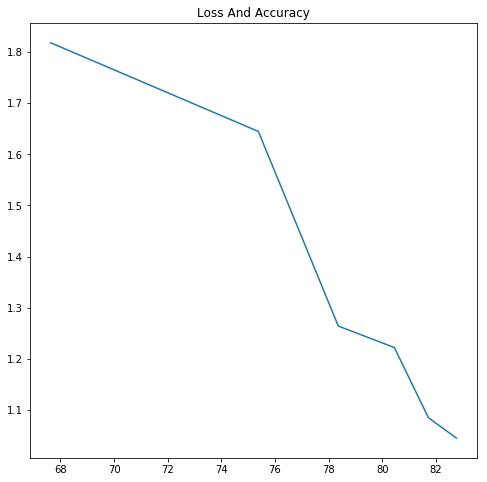

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title(s = 'Loss And Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.plot(all_accuracy, all_loss)

# A Very Simple Neural Net On A Very Simple Dataset

## Creating The Class

In [10]:
class FeedforwardNeuralNetModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3: 100 --> 64
        self.fc3 = nn.Linear(hidden_dim, 64)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 64 --> 10
        self.fc4 = nn.Linear(64, output_dim)  
    
    def forward(self, x):
        
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [11]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model_nn = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [12]:
model_nn.parameters

<bound method Module.parameters of FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=100)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=64)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=10)
)>

In [13]:
if torch.cuda.is_available():
    model_nn.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_nn.parameters(), lr=learning_rate)

## TRAIN THE MODEL

In [14]:
iter = 0
all_accuracy = []
all_loss = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model_nn(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                images = Variable(images.view(-1, 28*28).cuda())
                
                # Forward pass only to get logits/output
                outputs = model_nn(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.cpu() == labels.cpu()).sum()
            
            accuracy = 100 * correct / total
            all_loss.append(loss.data[0])
            all_accuracy.append(accuracy)
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.3472854197025299. Accuracy: 89.92
Iteration: 1000. Loss: 0.2566245198249817. Accuracy: 93.88
Iteration: 1500. Loss: 0.18336555361747742. Accuracy: 95.26
Iteration: 2000. Loss: 0.08581666648387909. Accuracy: 96.03
Iteration: 2500. Loss: 0.059236761182546616. Accuracy: 96.05
Iteration: 3000. Loss: 0.11973541229963303. Accuracy: 97.01


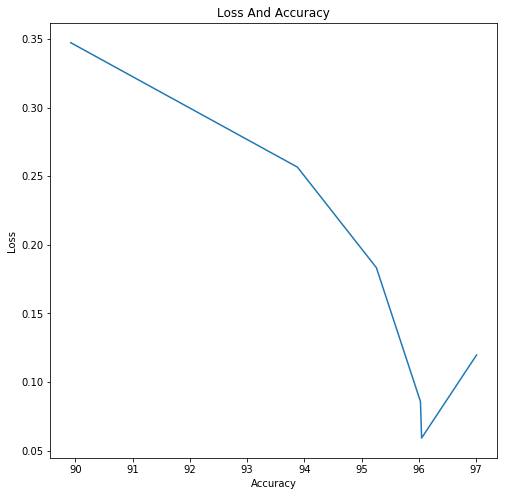

In [16]:
plt.figure(figsize=(8,8))
plt.title(s = 'Loss And Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.plot(all_accuracy, all_loss)